# EDA

In [3]:
import pandas as pd
import klib
a = pd.read_csv("BTC-USD.csv")

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

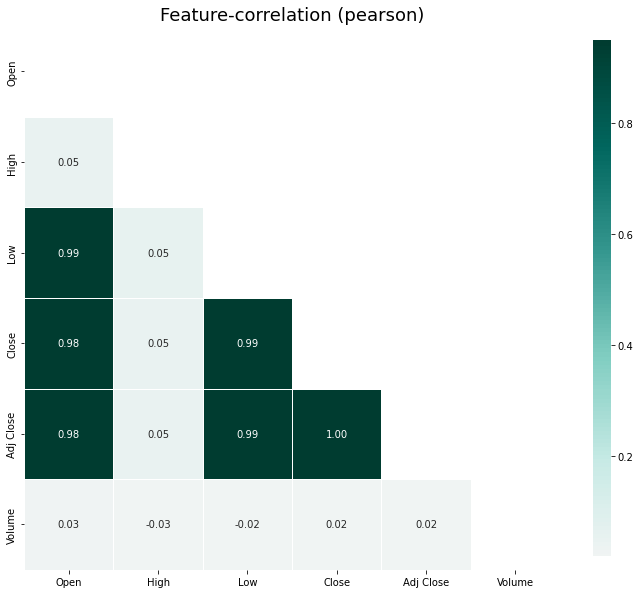

In [5]:
klib.corr_plot(a)

In [8]:
a.aggregate

<bound method DataFrame.aggregate of            date          open          high           low         close  \
0    15-12-2020  19246.919922  19525.007812  19079.841797  19417.076172   
1    16-12-2020  19418.818359  21458.908203  19298.316406  21310.597656   
2    17-12-2020  21308.351562  23642.660156  21234.675781  22805.162109   
3    18-12-2020  22806.796875  23238.601562    22399.8125  23137.960938   
4    19-12-2020  23132.865234  24085.855469  22826.472656  23869.832031   
..          ...           ...           ...           ...           ...   
361  11-12-2021  47264.632812  49458.210938  46942.347656  49362.507812   
362  12-12-2021  49354.855469  50724.867188  48725.851562  50098.335938   
363  13-12-2021  50114.742188       50205.0  45894.847656  46737.480469   
364  14-12-2021  46709.824219  48431.398438  46424.496094  46612.632812   
365  15-12-2021  48324.148438     5604063.0  47932.378906  48093.511719   

        adj_close         volume  
0    19417.076172  26741983

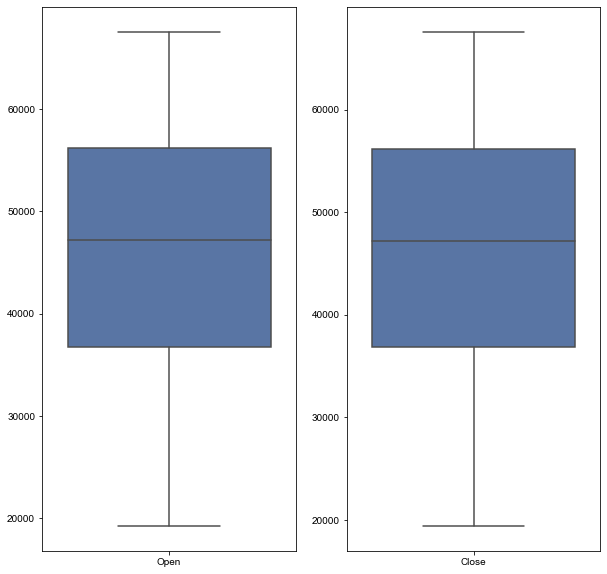

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(10,10))

sns.set(style='whitegrid')
sns.boxplot(data=df["Open"], ax=axs[0]).set_xticklabels(["Open"])
sns.boxplot(data=df["Close"], ax=axs[1]).set_xticklabels(["Close"])
plt.show()

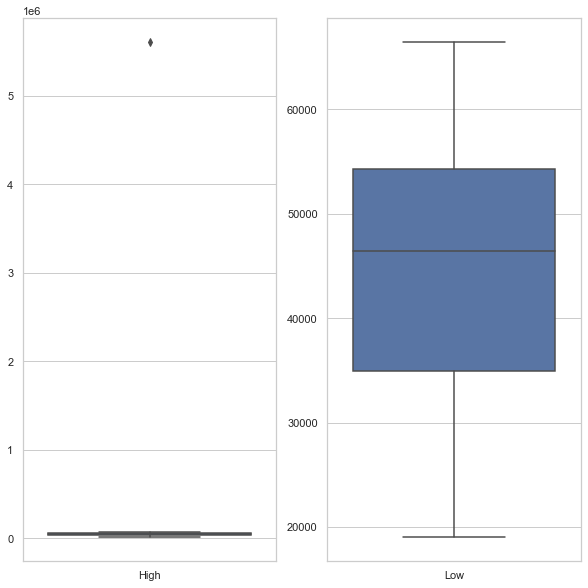

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(10,10))

sns.set(style='whitegrid')
sns.boxplot(data=df["High"], ax=axs[0]).set_xticklabels(["High"])
sns.boxplot(data=df["Low"], ax=axs[1]).set_xticklabels(["Low"])
plt.show()

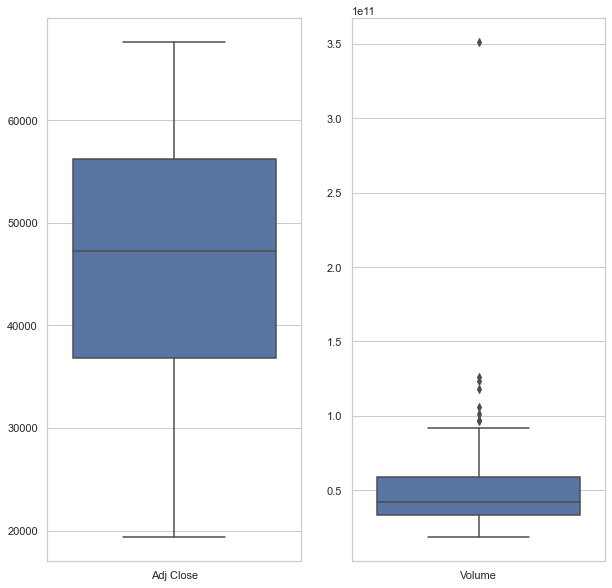

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(10,10))

sns.set(style='whitegrid')
sns.boxplot(data=df["Adj Close"], ax=axs[0]).set_xticklabels(["Adj Close"])
sns.boxplot(data=df["Volume"], ax=axs[1]).set_xticklabels(["Volume"])
plt.show()

Text(0.5, 1.0, 'time series plot')

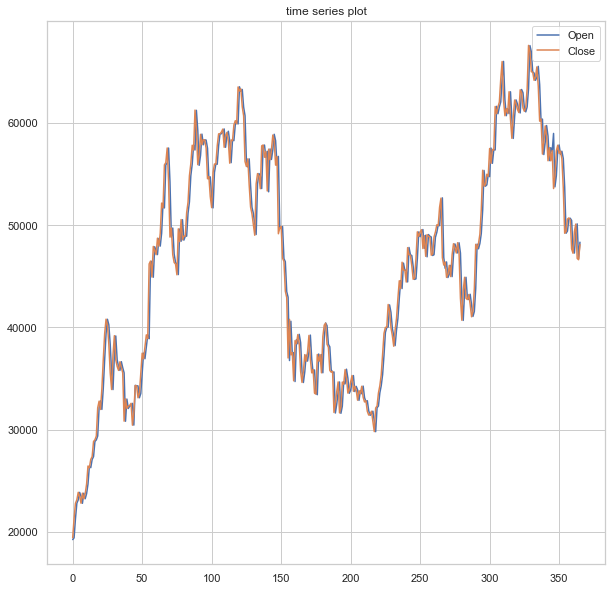

In [6]:
series = pd.DataFrame(df["Date"])
series["Open"] = df["Open"]
series["Close"] = df["Close"]
series.plot(figsize=(10,10))
plt.title('time series plot')


Text(0.5, 1.0, 'time series plot')

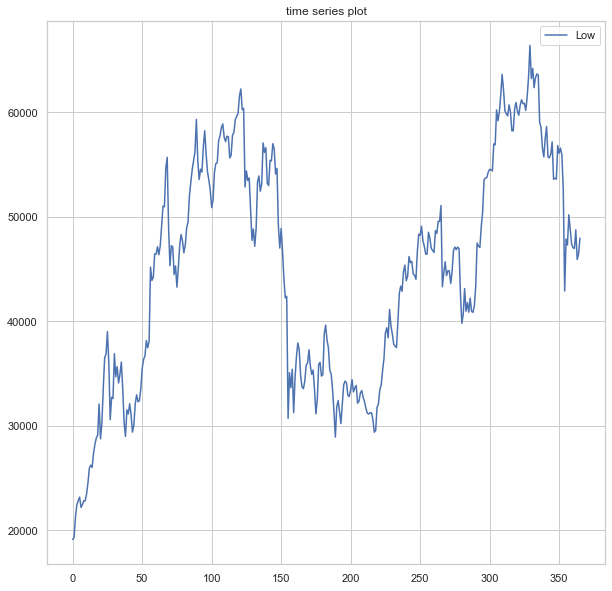

In [7]:
series1 = pd.DataFrame(df["Date"])
series1["Low"] = df["Low"]
# series["Close"] = df["Close"]
series1.plot(figsize=(10,10))
plt.title('time series plot')

Text(0.5, 1.0, 'time series plot')

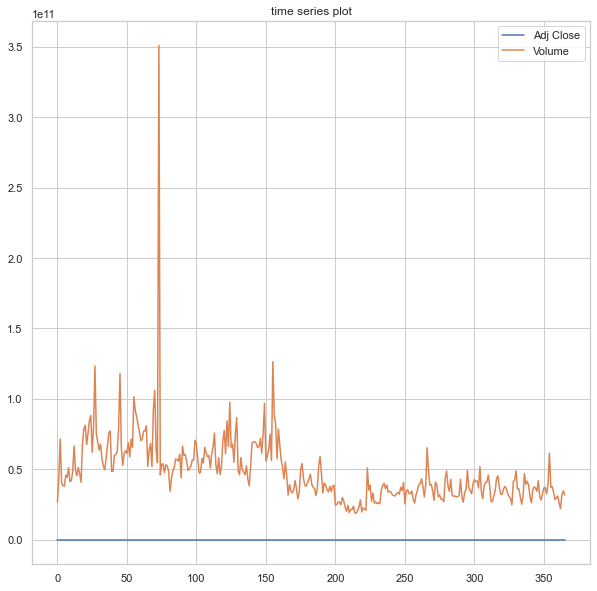

In [9]:
series3 = pd.DataFrame(df["Date"])
series3["Adj Close"] = df["Adj Close"]
series3["Volume"] = df["Volume"]
series3.plot(figsize=(10,10))
plt.title('time series plot')

<AxesSubplot:>

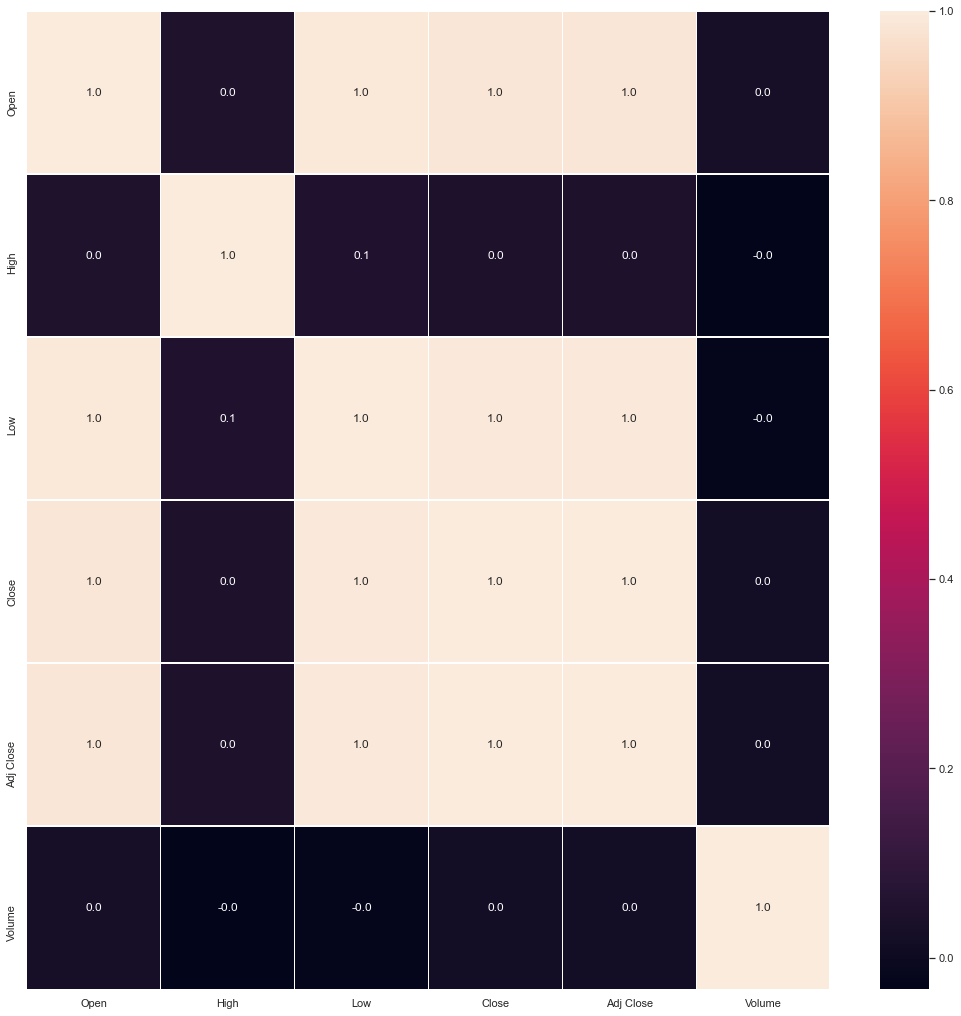

In [14]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# ARIMA

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\BTC-USD.csv", parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-15,19246.919922,19525.007813,19079.841797,19417.076172,19417.076172,26741982541
1,2020-12-16,19418.818359,21458.908203,19298.316406,21310.597656,21310.597656,44409011479
2,2020-12-17,21308.351563,23642.660156,21234.675781,22805.162109,22805.162109,71378606374
3,2020-12-18,22806.796875,23238.601563,22399.812500,23137.960938,23137.960938,40387896275
4,2020-12-19,23132.865234,24085.855469,22826.472656,23869.832031,23869.832031,38487546580


In [3]:
df.Date = pd.to_datetime(df.Date, unit='s')
df.index = df.Date
df = df.resample('D').mean()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-15,19246.919922,19525.007813,19079.841797,19417.076172,19417.076172,2.674198e+10
2020-12-16,19418.818359,21458.908203,19298.316406,21310.597656,21310.597656,4.440901e+10
2020-12-17,21308.351563,23642.660156,21234.675781,22805.162109,22805.162109,7.137861e+10
2020-12-18,22806.796875,23238.601563,22399.812500,23137.960938,23137.960938,4.038790e+10
2020-12-19,23132.865234,24085.855469,22826.472656,23869.832031,23869.832031,3.848755e+10


In [4]:
print(df.shape)

(366, 6)


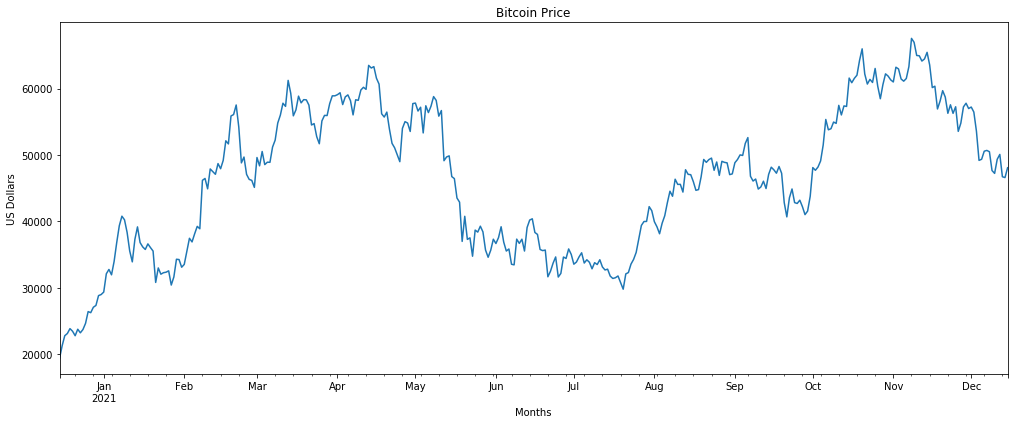

In [5]:
df.Close.plot(title = "Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Months')
plt.ylabel('US Dollars')
plt.show()

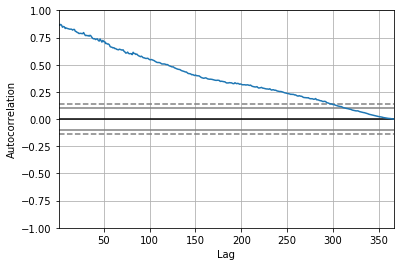

In [6]:
autocorrelation_plot(df)
plt.show()

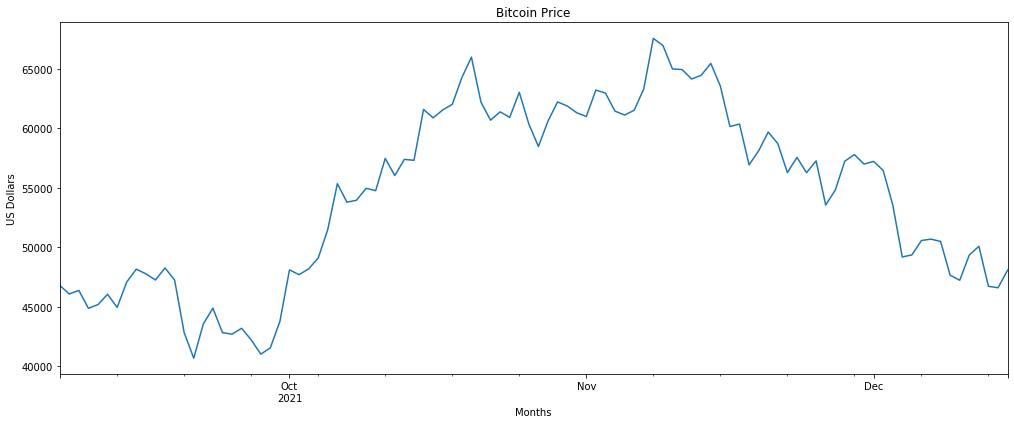

In [7]:
df.Close.iloc[-100:].plot(title = "Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Months')
plt.ylabel('US Dollars')
plt.show()

In [8]:
from statsmodels.tsa.arima_model import ARIMA
price = df.Close
X = price.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [9]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


predicted=48810.656583, expected=48902.402344
predicted=49220.442886, expected=48829.832031
predicted=48929.621802, expected=47054.984375
predicted=47418.745857, expected=47166.687500
predicted=47026.492667, expected=48847.027344
predicted=48761.510488, expected=49327.722656
predicted=49492.469559, expected=50025.375000
predicted=50243.846497, expected=49944.625000
predicted=50193.142636, expected=51753.410156
predicted=51723.541899, expected=52633.535156
predicted=52854.217658, expected=46811.128906
predicted=47508.176694, expected=46091.390625
predicted=45890.466690, expected=46391.421875
predicted=46170.320889, expected=44883.910156
predicted=44857.264545, expected=45201.457031
predicted=45327.045984, expected=46063.269531
predicted=46082.022856, expected=44963.074219
predicted=45160.954569, expected=47092.492188
predicted=47043.876268, expected=48176.347656
predicted=48312.371955, expected=47783.359375
predicted=48038.946488, expected=47267.519531
predicted=47527.963987, expected=4

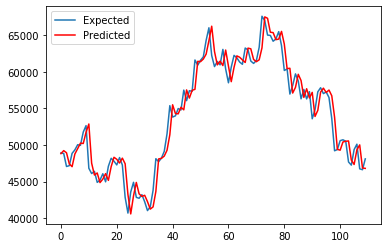

In [14]:
plt.plot(test ,label="Expected")
plt.plot(predictions, color='red', label="Predicted")
plt.legend(['Expected','Predicted'],loc="upper left")
plt.show()

# GRU

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

print("Imports Done")

Imports Done


In [4]:
df = pd.read_csv('/content/drive/MyDrive/BTC-USD.csv')
df = df.sort_values('Date').reset_index(drop=True)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-15,19246.919922,19525.007813,19079.841797,19417.076172,19417.076172,26741982541
1,2020-12-16,19418.818359,21458.908203,19298.316406,21310.597656,21310.597656,44409011479
2,2020-12-17,21308.351563,23642.660156,21234.675781,22805.162109,22805.162109,71378606374
3,2020-12-18,22806.796875,23238.601563,22399.812500,23137.960938,23137.960938,40387896275
4,2020-12-19,23132.865234,24085.855469,22826.472656,23869.832031,23869.832031,38487546580


In [6]:
df.shape

(366, 7)

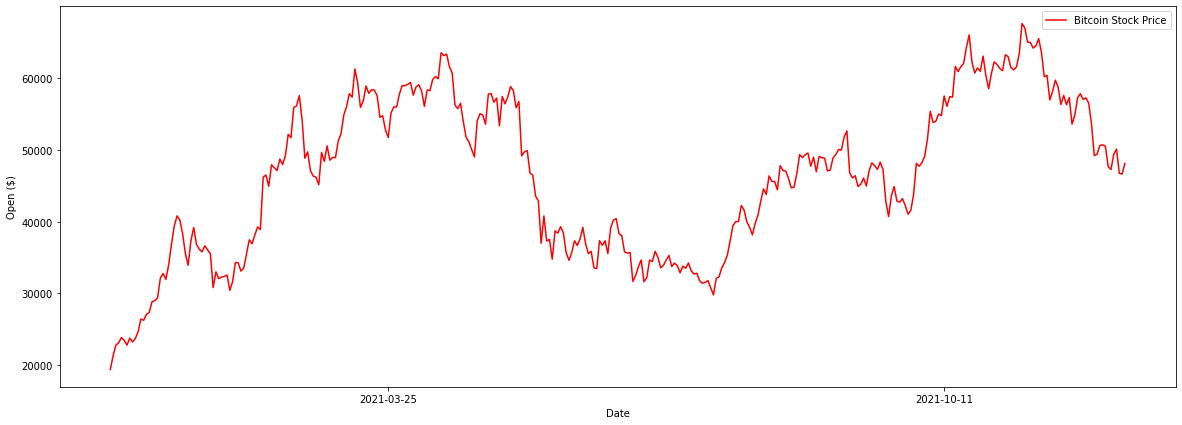

In [29]:
df['Open'] = df['Open'].astype(float)

plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['Close'].values, label = 'Bitcoin Stock Price', color = 'red')
plt.xticks(np.arange(100,df.shape[0],200))
plt.xlabel('Date')
plt.ylabel('Open ($)')
plt.legend()
plt.show()

In [32]:
# 0->295=>training
# 295->366=>testing
# Open prices are predicted
num_shape = 295

train = df.iloc[:num_shape, 1:2].values
test = df.iloc[num_shape:, 1:2].values
print(train.shape)
print(test.shape)


(295, 1)
(71, 1)


In [34]:
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)
print(train_scaled.shape)
print(train_scaled)

(295, 1)
[[0.        ]
 [0.00388236]
 [0.04655779]
 [0.08040044]
 [0.08776475]
 [0.10422709]
 [0.09547962]
 [0.0801123 ]
 [0.102425  ]
 [0.090189  ]
 [0.10133178]
 [0.12263966]
 [0.16244281]
 [0.15886191]
 [0.17695237]
 [0.18323735]
 [0.21669694]
 [0.22013972]
 [0.22877731]
 [0.29095324]
 [0.30634596]
 [0.287512  ]
 [0.33350834]
 [0.39720444]
 [0.45474899]
 [0.48652351]
 [0.4744535 ]
 [0.43136805]
 [0.36744812]
 [0.33128388]
 [0.40829905]
 [0.44966601]
 [0.3969283 ]
 [0.38206726]
 [0.37367889]
 [0.3928762 ]
 [0.37950305]
 [0.36819431]
 [0.26132639]
 [0.31029404]
 [0.2894845 ]
 [0.29448535]
 [0.29612988]
 [0.30076923]
 [0.25282117]
 [0.34039814]
 [0.33988459]
 [0.33931873]
 [0.31320347]
 [0.3226581 ]
 [0.36732302]
 [0.41168674]
 [0.39941038]
 [0.42666706]
 [0.45177737]
 [0.44357074]
 [0.60840105]
 [0.61483262]
 [0.57935016]
 [0.64661613]
 [0.63790205]
 [0.62939432]
 [0.66512468]
 [0.64813887]
 [0.67665989]
 [0.7429179 ]
 [0.73241598]
 [0.82753017]
 [0.83162329]
 [0.86469187]
 [0.7895327

In [37]:
X_train = []

#Price on next day
y_train = []

window = 10

for i in range(window, num_shape):
    X_train_ = np.reshape(train_scaled[i-window:i, 0], (window, 1))
    X_train.append(X_train_)
    y_train.append(train_scaled[i, 0])
X_train = np.stack(X_train)
y_train = np.stack(y_train)
print(X_train.shape)
print(y_train.shape)

(285, 10, 1)
(285,)


In [15]:
# The GRU architecture
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 50)            7950      
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 10, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 10, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 10, 50)            15300     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 50)                1

In [16]:
modelGRU.compile(optimizer='adam', loss='mean_squared_error')
modelGRU.fit(X_train, y_train, epochs=500, batch_size=16)

Epoch 1/500
18/18 [==============================] - 9s 26ms/step - loss: 0.0824
Epoch 2/500
18/18 [==============================] - 0s 27ms/step - loss: 0.0199
Epoch 3/500
18/18 [==============================] - 0s 25ms/step - loss: 0.0155
Epoch 4/500
18/18 [==============================] - 0s 27ms/step - loss: 0.0122
Epoch 5/500
18/18 [==============================] - 0s 26ms/step - loss: 0.0115
Epoch 6/500
18/18 [==============================] - 0s 26ms/step - loss: 0.0135
Epoch 7/500
18/18 [==============================] - 0s 25ms/step - loss: 0.0123
Epoch 8/500
18/18 [==============================] - 0s 25ms/step - loss: 0.0104
Epoch 9/500
18/18 [==============================] - 0s 25ms/step - loss: 0.0113
Epoch 10/500
18/18 [==============================] - 0s 27ms/step - loss: 0.0102
Epoch 11/500
18/18 [==============================] - 0s 26ms/step - loss: 0.0108
Epoch 12/500
18/18 [==============================] - 0s 26ms/step - loss: 0.0096
Epoch 13/500
18/18 [=====

In [38]:
df_volume = np.vstack((train, test))

inputs = df_volume[df_volume.shape[0] - test.shape[0] - window:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

num_2 = df_volume.shape[0] - num_shape + window

X_test = []

for i in range(window, num_2):
    X_test_ = np.reshape(inputs[i-window:i, 0], (window, 1))
    X_test.append(X_test_)
    
X_test = np.stack(X_test)
print(X_test.shape)

(71, 10, 1)


In [39]:
predict = modelGRU.predict(X_test)
predict = sc.inverse_transform(predict)
print(predict.shape)

(71, 1)


In [20]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

MSE: 6056481.14808747
MAE: 1936.405534841549
RMSE: 2460.991903295797


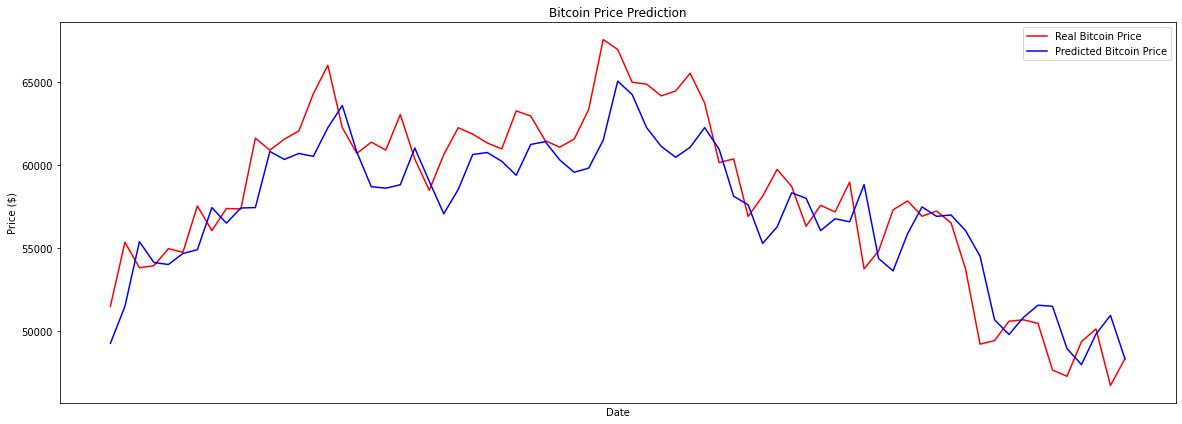

In [27]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[295:], df_volume[295:], color = 'red', label = 'Real Bitcoin Price')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted Bitcoin Price')
plt.xticks(np.arange(100,df[1800:].shape[0],20))
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv(r'BTC-USD.csv')

In [2]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-15,19246.919922,1.952501e+04,19079.841797,19417.076172,19417.076172,26741982541
1,2020-12-16,19418.818359,2.145891e+04,19298.316406,21310.597656,21310.597656,44409011479
2,2020-12-17,21308.351563,2.364266e+04,21234.675781,22805.162109,22805.162109,71378606374
3,2020-12-18,22806.796875,2.323860e+04,22399.812500,23137.960938,23137.960938,40387896275
4,2020-12-19,23132.865234,2.408586e+04,22826.472656,23869.832031,23869.832031,38487546580
...,...,...,...,...,...,...,...
361,2021-12-11,47264.632813,4.945821e+04,46942.347656,49362.507813,49362.507813,25775869261
362,2021-12-12,49354.855469,5.072487e+04,48725.851563,50098.335938,50098.335938,21939223599
363,2021-12-13,50114.742188,5.020500e+04,45894.847656,46737.480469,46737.480469,32166727776
364,2021-12-14,46709.824219,4.843140e+04,46424.496094,46612.632813,46612.632813,34638619079


In [15]:
data_training = df[df['Date']< '2021-11-15']
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-15,19246.919922,19525.007813,19079.841797,19417.076172,19417.076172,26741982541
1,2020-12-16,19418.818359,21458.908203,19298.316406,21310.597656,21310.597656,44409011479
2,2020-12-17,21308.351563,23642.660156,21234.675781,22805.162109,22805.162109,71378606374
3,2020-12-18,22806.796875,23238.601563,22399.812500,23137.960938,23137.960938,40387896275
4,2020-12-19,23132.865234,24085.855469,22826.472656,23869.832031,23869.832031,38487546580
...,...,...,...,...,...,...,...
330,2021-11-10,66953.335938,68789.625000,63208.113281,64995.230469,64995.230469,48730828378
331,2021-11-11,64978.890625,65579.015625,64180.488281,64949.960938,64949.960938,35880633236
332,2021-11-12,64863.980469,65460.816406,62333.914063,64155.941406,64155.941406,36084893887
333,2021-11-13,64158.121094,64915.675781,63303.734375,64469.527344,64469.527344,30474228777


In [16]:
data_test = df[df['Date'] >= '2021-11-15']
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
335,2021-11-15,65521.289063,6.628157e+04,63548.144531,63557.871094,63557.871094,30558763548
336,2021-11-16,63721.195313,6.372120e+04,59016.335938,60161.246094,60161.246094,46844335592
337,2021-11-17,60139.621094,6.082361e+04,58515.410156,60368.011719,60368.011719,39178392930
338,2021-11-18,60360.136719,6.094850e+04,56550.792969,56942.136719,56942.136719,41388338699
339,2021-11-19,56896.128906,5.835111e+04,55705.179688,58119.578125,58119.578125,38702407772
340,2021-11-20,58115.082031,5.985988e+04,57469.726563,59697.195313,59697.195313,30624264863
341,2021-11-21,59730.507813,6.000443e+04,58618.929688,58730.476563,58730.476563,26123447605
342,2021-11-22,58706.847656,5.926636e+04,55679.839844,56289.289063,56289.289063,35036121783
343,2021-11-23,56304.554688,5.787552e+04,55632.761719,57569.074219,57569.074219,37485803899
344,2021-11-24,57565.851563,5.780307e+04,55964.222656,56280.425781,56280.425781,36635566789


In [17]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,19246.919922,19525.007813,19079.841797,19417.076172,26741982541
1,19418.818359,21458.908203,19298.316406,21310.597656,44409011479
2,21308.351563,23642.660156,21234.675781,22805.162109,71378606374
3,22806.796875,23238.601563,22399.812500,23137.960938,40387896275
4,23132.865234,24085.855469,22826.472656,23869.832031,38487546580


In [18]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.        , 0.        , 0.        , 0.        , 0.02394484],
       [0.00355877, 0.03925536, 0.0046187 , 0.03932567, 0.07712995],
       [0.04267726, 0.08358235, 0.04555461, 0.07036559, 0.15831967],
       ...,
       [0.94439757, 0.93243003, 0.91441948, 0.92916087, 0.05207089],
       [0.92978435, 0.92136447, 0.93492212, 0.93567359, 0.03518046],
       [0.93593824, 0.93312756, 0.94219608, 0.95638631, 0.0190683 ]])

In [19]:
X_train = [] 
Y_train = []
print(training_data.shape[0])
for i in range(20, training_data.shape[0]):
    X_train.append(training_data[i-20:i])
    Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train

335


array([[[0.        , 0.        , 0.        , 0.        , 0.02394484],
        [0.00355877, 0.03925536, 0.0046187 , 0.03932567, 0.07712995],
        [0.04267726, 0.08358235, 0.04555461, 0.07036559, 0.15831967],
        ...,
        [0.20179134, 0.2045204 , 0.20556633, 0.20679392, 0.06605551],
        [0.209709  , 0.27667137, 0.2116463 , 0.26397211, 0.14774351],
        [0.26670264, 0.30617412, 0.27424663, 0.27757043, 0.18025545]],

       [[0.00355877, 0.03925536, 0.0046187 , 0.03932567, 0.07712995],
        [0.04267726, 0.08358235, 0.04555461, 0.07036559, 0.15831967],
        [0.07369916, 0.07538055, 0.07018636, 0.07727734, 0.06502472],
        ...,
        [0.209709  , 0.27667137, 0.2116463 , 0.26397211, 0.14774351],
        [0.26670264, 0.30617412, 0.27424663, 0.27757043, 0.18025545],
        [0.2808124 , 0.28245852, 0.20385753, 0.26074564, 0.1877762 ]],

       [[0.04267726, 0.08358235, 0.04555461, 0.07036559, 0.15831967],
        [0.07369916, 0.07538055, 0.07018636, 0.07727734, 0.0

In [20]:
Y_train

array([0.2808124 , 0.26354823, 0.30571083, 0.36409794, 0.41684622,
       0.44597237, 0.43490838, 0.39541405, 0.33682177, 0.30367177,
       0.37426783, 0.41218689, 0.36384481, 0.35022242, 0.34253322,
       0.36013045, 0.34787193, 0.33750577, 0.23954515, 0.28443142,
       0.26535632, 0.26994036, 0.27144781, 0.27570049, 0.23174884,
       0.31202637, 0.31155563, 0.31103693, 0.28709835, 0.29576495,
       0.3367071 , 0.37737316, 0.36612001, 0.39110489, 0.41412228,
       0.40659967, 0.55769157, 0.56358707, 0.53106204, 0.59272147,
       0.5847337 , 0.57693508, 0.60968736, 0.59411729, 0.62026111,
       0.68099661, 0.67137   , 0.75855654, 0.76230851, 0.79262086,
       0.72372615, 0.61255574, 0.63064984, 0.57830057, 0.56099947,
       0.55787838, 0.53646116, 0.62864216, 0.60387571, 0.64748576,
       0.60617816, 0.6138837 , 0.61428635, 0.66098006, 0.68372929,
       0.73654283, 0.76012672, 0.79859319, 0.78870044, 0.86898069,
       0.8285337 , 0.75759282, 0.77798589, 0.82078361, 0.79919

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [22]:
model = Sequential() 

model.add(LSTM(units = 1000, activation = 'relu', input_shape = (X_train.shape[1], 5)))

model.add(Dense(units =1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1000)              4024000   
_________________________________________________________________
dense (Dense)                (None, 1)                 1001      
Total params: 4,025,001
Trainable params: 4,025,001
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer = "adam", loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 100, batch_size =50, validation_split=0.1)

Epoch 1/100
6/6 [==============================] - 3s 293ms/step - loss: 0.0971 - val_loss: 0.0745
Epoch 2/100
6/6 [==============================] - 2s 258ms/step - loss: 0.0301 - val_loss: 0.0265
Epoch 3/100
6/6 [==============================] - 2s 263ms/step - loss: 0.0088 - val_loss: 0.0025
Epoch 4/100
6/6 [==============================] - 2s 261ms/step - loss: 0.0058 - val_loss: 0.0223
Epoch 5/100
6/6 [==============================] - 2s 258ms/step - loss: 0.0054 - val_loss: 0.0033
Epoch 6/100
6/6 [==============================] - 2s 261ms/step - loss: 0.0045 - val_loss: 0.0055
Epoch 7/100
6/6 [==============================] - 2s 262ms/step - loss: 0.0040 - val_loss: 0.0061
Epoch 8/100
6/6 [==============================] - 2s 260ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 9/100
6/6 [==============================] - 2s 262ms/step - loss: 0.0036 - val_loss: 0.0054
Epoch 10/100
6/6 [==============================] - 2s 265ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 11/

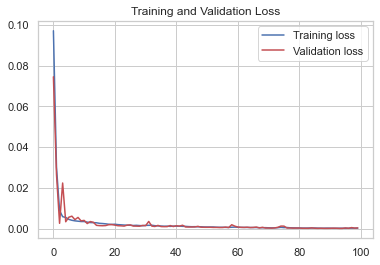

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [25]:
part_20_days = data_training.tail(20)
df= part_20_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,63032.761719,63229.027344,59991.160156,60363.792969,34878965587
1,60352.000000,61435.183594,58208.187500,58482.386719,43657076893
2,58470.730469,62128.632813,58206.917969,60622.136719,45257083247
3,60624.871094,62927.609375,60329.964844,62227.964844,36856881767
4,62239.363281,62330.144531,60918.386719,61888.832031,32157938616


In [26]:
# df["Open"][]

In [27]:
inputs = scaler.transform(df) 
inputs.shape


(51, 5)

In [28]:
X_test = []
Y_test = []

In [29]:
type(X_test)

list

In [30]:
for i in range (20, inputs.shape[0]):
    X_test.append(inputs[i-20:i]) 
    Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test) 
print(X_test.shape, Y_test.shape)
Y_pred = model.predict(X_test) 
print(Y_pred, Y_test)
scaler.scale_

(31, 20, 5) (31,)
[[0.93303114]
 [0.9120187 ]
 [0.82680327]
 [0.82685715]
 [0.7758012 ]
 [0.77652127]
 [0.81967   ]
 [0.8086222 ]
 [0.7561814 ]
 [0.7745404 ]
 [0.759806  ]
 [0.7923755 ]
 [0.71910125]
 [0.72143596]
 [0.7626248 ]
 [0.7938201 ]
 [0.7726759 ]
 [0.7821078 ]
 [0.7573882 ]
 [0.7063113 ]
 [0.5799048 ]
 [0.61777705]
 [0.624008  ]
 [0.6490651 ]
 [0.62698025]
 [0.5894563 ]
 [0.58388704]
 [0.6044178 ]
 [0.63022953]
 [0.56708044]
 [0.5683655 ]] [0.95800565 0.9207388  0.84659044 0.85115572 0.77944131 0.80467696
 0.83812068 0.81692813 0.76719411 0.7933064  0.78501633 0.82217497
 0.71402692 0.73631535 0.78763498 0.79877733 0.77968635 0.7860919
 0.77143008 0.71384989 0.62014191 0.62453008 0.64871806 0.65049478
 0.64599056 0.58785859 0.58004307 0.62331638 0.63904811 0.56855702
 0.60197794]


array([2.07027274e-05, 2.02985440e-05, 2.11406565e-05, 2.07685390e-05,
       3.01041645e-12])

In [31]:
scale = 1/2.07027274e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale
Y_pred

array([[45068.027],
       [44053.07 ],
       [39936.92 ],
       [39939.527],
       [37473.38 ],
       [37508.16 ],
       [39592.367],
       [39058.727],
       [36525.688],
       [37412.48 ],
       [36700.766],
       [38273.965],
       [34734.613],
       [34847.387],
       [36836.92 ],
       [38343.742],
       [37322.418],
       [37778.004],
       [36583.98 ],
       [34116.82 ],
       [28011.033],
       [29840.37 ],
       [30141.342],
       [31351.668],
       [30284.91 ],
       [28472.398],
       [28203.387],
       [29195.08 ],
       [30441.86 ],
       [27391.58 ],
       [27453.652]], dtype=float32)

In [32]:
Y_test

array([46274.36912836, 44474.27537885, 40892.70116083, 41113.21678577,
       37649.20897371, 38868.16209838, 40483.58787994, 39459.92772322,
       37057.63475587, 38318.93163053, 37918.49803664, 39713.36522315,
       34489.50975658, 35566.10350628, 38044.9863176 , 38583.19334846,
       37661.04491171, 37970.45116162, 37262.24413082, 34480.95897458,
       29954.59960082, 30166.56053876, 31334.90819444, 31420.72850741,
       31203.16210047, 28395.22460124, 28017.71288334, 30107.93553877,
       30867.82225757, 27462.9042895 , 29077.22850805])

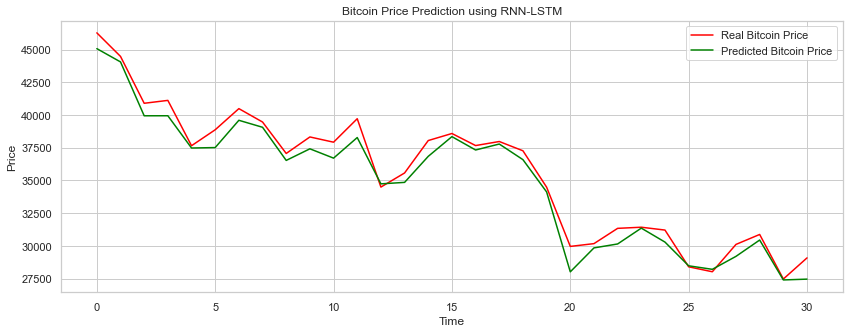

In [33]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 722.9940695263116
MSE: 777718.1967947704
RMSE: 881.8833237989992


# Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_CP/BTC-USD.csv')
df

In [ ]:
x=df.drop(['Date','Close','Adj Close','High','Low'],axis=1)
x


In [ ]:
y=pd.DataFrame(df['Close'])
y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(x_test)
y_prediction

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.9618589983781762
mean_sqrd_error is== 4449839.006618609
root_mean_squared error of is== 2109.4641515367375


In [ ]:
LR.coef_ 

array([[ 9.85665551e-01, -1.46271619e-08]])

# RandomForest

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np 

In [163]:
df = pd.read_csv('BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-12-2020,19246.91992,1.952501e+04,19079.84180,19417.07617,19417.07617,2.674198e+10
1,16-12-2020,19418.81836,2.145891e+04,19298.31641,21310.59766,21310.59766,4.440901e+10
2,17-12-2020,21308.35156,2.364266e+04,21234.67578,22805.16211,22805.16211,7.137861e+10
3,18-12-2020,22806.79688,2.323860e+04,22399.81250,23137.96094,23137.96094,4.038790e+10
4,19-12-2020,23132.86523,2.408586e+04,22826.47266,23869.83203,23869.83203,3.848755e+10
...,...,...,...,...,...,...,...
361,11-12-2021,47264.63281,4.945821e+04,46942.34766,49362.50781,49362.50781,2.577587e+10
362,12-12-2021,49354.85547,5.072487e+04,48725.85156,50098.33594,50098.33594,2.193922e+10
363,13-12-2021,50114.74219,5.020500e+04,45894.84766,46737.48047,46737.48047,3.216673e+10
364,14-12-2021,46709.82422,4.843140e+04,46424.49609,46612.63281,46612.63281,3.463862e+10


In [56]:
x=df.drop(['Date','Close','Adj Close','High', 'Low'],axis=1)
x

,Open,Volume
0,19246.91992,2.674198e+10
1,19418.81836,4.440901e+10
2,21308.35156,7.137861e+10
3,22806.79688,4.038790e+10
4,23132.86523,3.848755e+10
...,...,...
361,47264.63281,2.577587e+10
362,49354.85547,2.193922e+10
363,50114.74219,3.216673e+10
364,46709.82422,3.463862e+10


In [57]:
y=pd.DataFrame(df['Close'])
y

,Close
0,19417.07617
1,21310.59766
2,22805.16211
3,23137.96094
4,23869.83203
...,...
361,49362.50781
362,50098.33594
363,46737.48047
364,46612.63281


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [59]:
from sklearn.ensemble import RandomForestRegressor

d = RandomForestRegressor(n_estimators=400)

In [60]:
d.fit(x_train,y_train.values.ravel())

RandomForestRegressor(n_estimators=400)

In [61]:
y_pred = d.predict(x_test)

In [62]:
y_pred

array([32568.33635383, 35349.94143197, 27049.4586116 , 64049.0114162 ,
       45333.13784272, 41078.16026577, 46471.50309732, 58313.93308772,
       46039.48235557, 56205.17066332, 57261.71425152, 33457.8706589 ,
       61433.88239255, 38313.13549962, 58447.45666283, 57101.05466987,
       22798.7289526 , 47604.12203227, 51056.2064552 , 54215.64513707,
       23964.57926355, 36367.58498217, 49552.95016903, 47396.37885742,
       46565.35933762, 34956.9668481 , 32647.7998776 , 47828.8430068 ,
       57220.61340157, 49774.3048148 , 41037.12179668, 59075.87591952,
       33097.98579143, 56223.69854575, 34798.3629813 , 57279.11103353,
       47649.68384593, 33742.45635915, 53661.44880152, 65152.7249625 ,
       47593.7700489 , 59145.0214457 , 37085.9617872 , 54171.7294755 ,
       59041.30483467, 42908.2609457 , 58309.09111697, 45480.16009795,
       24237.10307338, 34407.0056655 , 40349.77697417, 57243.76043207,
       46772.84181847, 49446.81074407, 33711.52921365, 59574.39033358,
      

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [64]:
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

mean_sqrd_error is== 4508590.850156582
root_mean_squared error of is== 2123.3442608669425


In [65]:
d.score(x_test,y_test)

0.9613554174299267

# ES

In [66]:
from statsmodels.tsa.api import SimpleExpSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [71]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-12-2020,19246.91992,1.952501e+04,19079.84180,19417.07617,19417.07617,2.674198e+10
1,16-12-2020,19418.81836,2.145891e+04,19298.31641,21310.59766,21310.59766,4.440901e+10
2,17-12-2020,21308.35156,2.364266e+04,21234.67578,22805.16211,22805.16211,7.137861e+10
3,18-12-2020,22806.79688,2.323860e+04,22399.81250,23137.96094,23137.96094,4.038790e+10
4,19-12-2020,23132.86523,2.408586e+04,22826.47266,23869.83203,23869.83203,3.848755e+10
...,...,...,...,...,...,...,...
361,11-12-2021,47264.63281,4.945821e+04,46942.34766,49362.50781,49362.50781,2.577587e+10
362,12-12-2021,49354.85547,5.072487e+04,48725.85156,50098.33594,50098.33594,2.193922e+10
363,13-12-2021,50114.74219,5.020500e+04,45894.84766,46737.48047,46737.48047,3.216673e+10
364,14-12-2021,46709.82422,4.843140e+04,46424.49609,46612.63281,46612.63281,3.463862e+10


In [73]:
import plotly.express as px
fig = px.line(x = df['Date'], y = df['Close'])
fig.show()

In [158]:
data = df[['Close']]

In [159]:
data

,Close
0,19417.07617
1,21310.59766
2,22805.16211
3,23137.96094
4,23869.83203
...,...
361,49362.50781
362,50098.33594
363,46737.48047
364,46612.63281


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   366 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


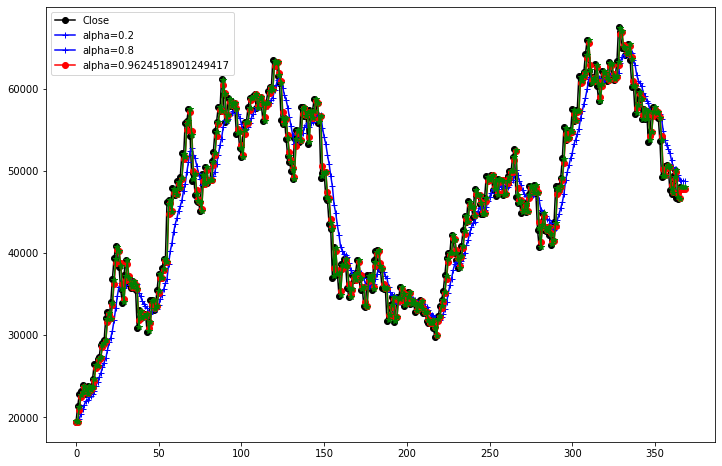

In [162]:
import matplotlib.pyplot as plt

ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')

#Third Instance
ins3 = SimpleExpSmoothing(data).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = data.plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()